In [2]:
import os
import tensorflow as tf
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout,Activation,BatchNormalization,Input
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.activations import relu
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from keras.regularizers import l2
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator


In [3]:
devices = tf.config.experimental.list_physical_devices()
print(devices)
tf.config.experimental.set_memory_growth(devices[1],True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
DATASET_DIR = "Plant Disaes/"
TRAIN_DIR = DATASET_DIR+"train"
TEST_DIR = DATASET_DIR+"test"
VALID_DIR = DATASET_DIR+"valid"

In [5]:
plant_disaes = os.listdir(TRAIN_DIR)

In [6]:
plant_disaes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [7]:
len(plant_disaes)

38

In [8]:
os.getcwd()

'd:\\Pyhton Projects\\Projects\\Plant Disaes Classification'

Tensorflow Part

In [9]:
from tensorflow.keras.utils import image_dataset_from_directory

train_batchs = image_dataset_from_directory(

    						label_mode="int",
                            seed=123,
                            directory=TRAIN_DIR,
                            image_size=(224,224),
                            batch_size=32,
                            shuffle=True,
                           
                            )

test_batchs = image_dataset_from_directory(	

    						label_mode="int",
                            subset="validation",
        					seed=123,
                            validation_split=0.2,
                            directory=TRAIN_DIR,
                            image_size=(224,224),
                            batch_size=32,
                            shuffle=True
                            
                            )


valid_batchs = image_dataset_from_directory(	

    						label_mode="int",
        					seed=123,
                            directory=VALID_DIR,
                            image_size=(224,224),
                            batch_size=32,
                            shuffle=True
                            
                            )

Found 70295 files belonging to 38 classes.
Found 70295 files belonging to 38 classes.
Using 14059 files for validation.
Found 17572 files belonging to 38 classes.


In [11]:
train_batchs.class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
classes=list(train_batchs.class_names)
class_indices=list(train_batchs.class_names)
num_of_classes=len(classes)
num_of_classes

38

In [12]:
num_of_classes

38

In [12]:
values = list(train_batchs.take(1))[0]
values

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
 array([[[[154.46428 , 149.46428 , 146.46428 ],
          [154.84694 , 149.84694 , 146.84694 ],
          [148.87245 , 143.87245 , 140.87245 ],
          ...,
          [194.23985 , 194.23985 , 196.23985 ],
          [198.30104 , 198.30104 , 200.30104 ],
          [197.13773 , 197.13773 , 199.13773 ]],
 
         [[161.23979 , 156.23979 , 153.23979 ],
          [167.81123 , 162.81123 , 159.81123 ],
          [163.0051  , 158.0051  , 155.0051  ],
          ...,
          [194.648   , 194.648   , 196.648   ],
          [197.57144 , 197.57144 , 199.57144 ],
          [197.2704  , 197.2704  , 199.2704  ]],
 
         [[168.53061 , 163.53061 , 160.53061 ],
          [169.04591 , 164.04591 , 161.04591 ],
          [163.64796 , 158.64796 , 155.64796 ],
          ...,
          [195.77043 , 195.77043 , 197.77043 ],
          [198.28572 , 198.28572 , 200.28572 ],
          [199.04593 , 199.04593 , 201.04593 ]],
 
         ...,
 
      

In [13]:
imgs,labels = values[0],values[1]
imgs,labels

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
 array([[[[154.46428 , 149.46428 , 146.46428 ],
          [154.84694 , 149.84694 , 146.84694 ],
          [148.87245 , 143.87245 , 140.87245 ],
          ...,
          [194.23985 , 194.23985 , 196.23985 ],
          [198.30104 , 198.30104 , 200.30104 ],
          [197.13773 , 197.13773 , 199.13773 ]],
 
         [[161.23979 , 156.23979 , 153.23979 ],
          [167.81123 , 162.81123 , 159.81123 ],
          [163.0051  , 158.0051  , 155.0051  ],
          ...,
          [194.648   , 194.648   , 196.648   ],
          [197.57144 , 197.57144 , 199.57144 ],
          [197.2704  , 197.2704  , 199.2704  ]],
 
         [[168.53061 , 163.53061 , 160.53061 ],
          [169.04591 , 164.04591 , 161.04591 ],
          [163.64796 , 158.64796 , 155.64796 ],
          ...,
          [195.77043 , 195.77043 , 197.77043 ],
          [198.28572 , 198.28572 , 200.28572 ],
          [199.04593 , 199.04593 , 201.04593 ]],
 
         ...,
 
      

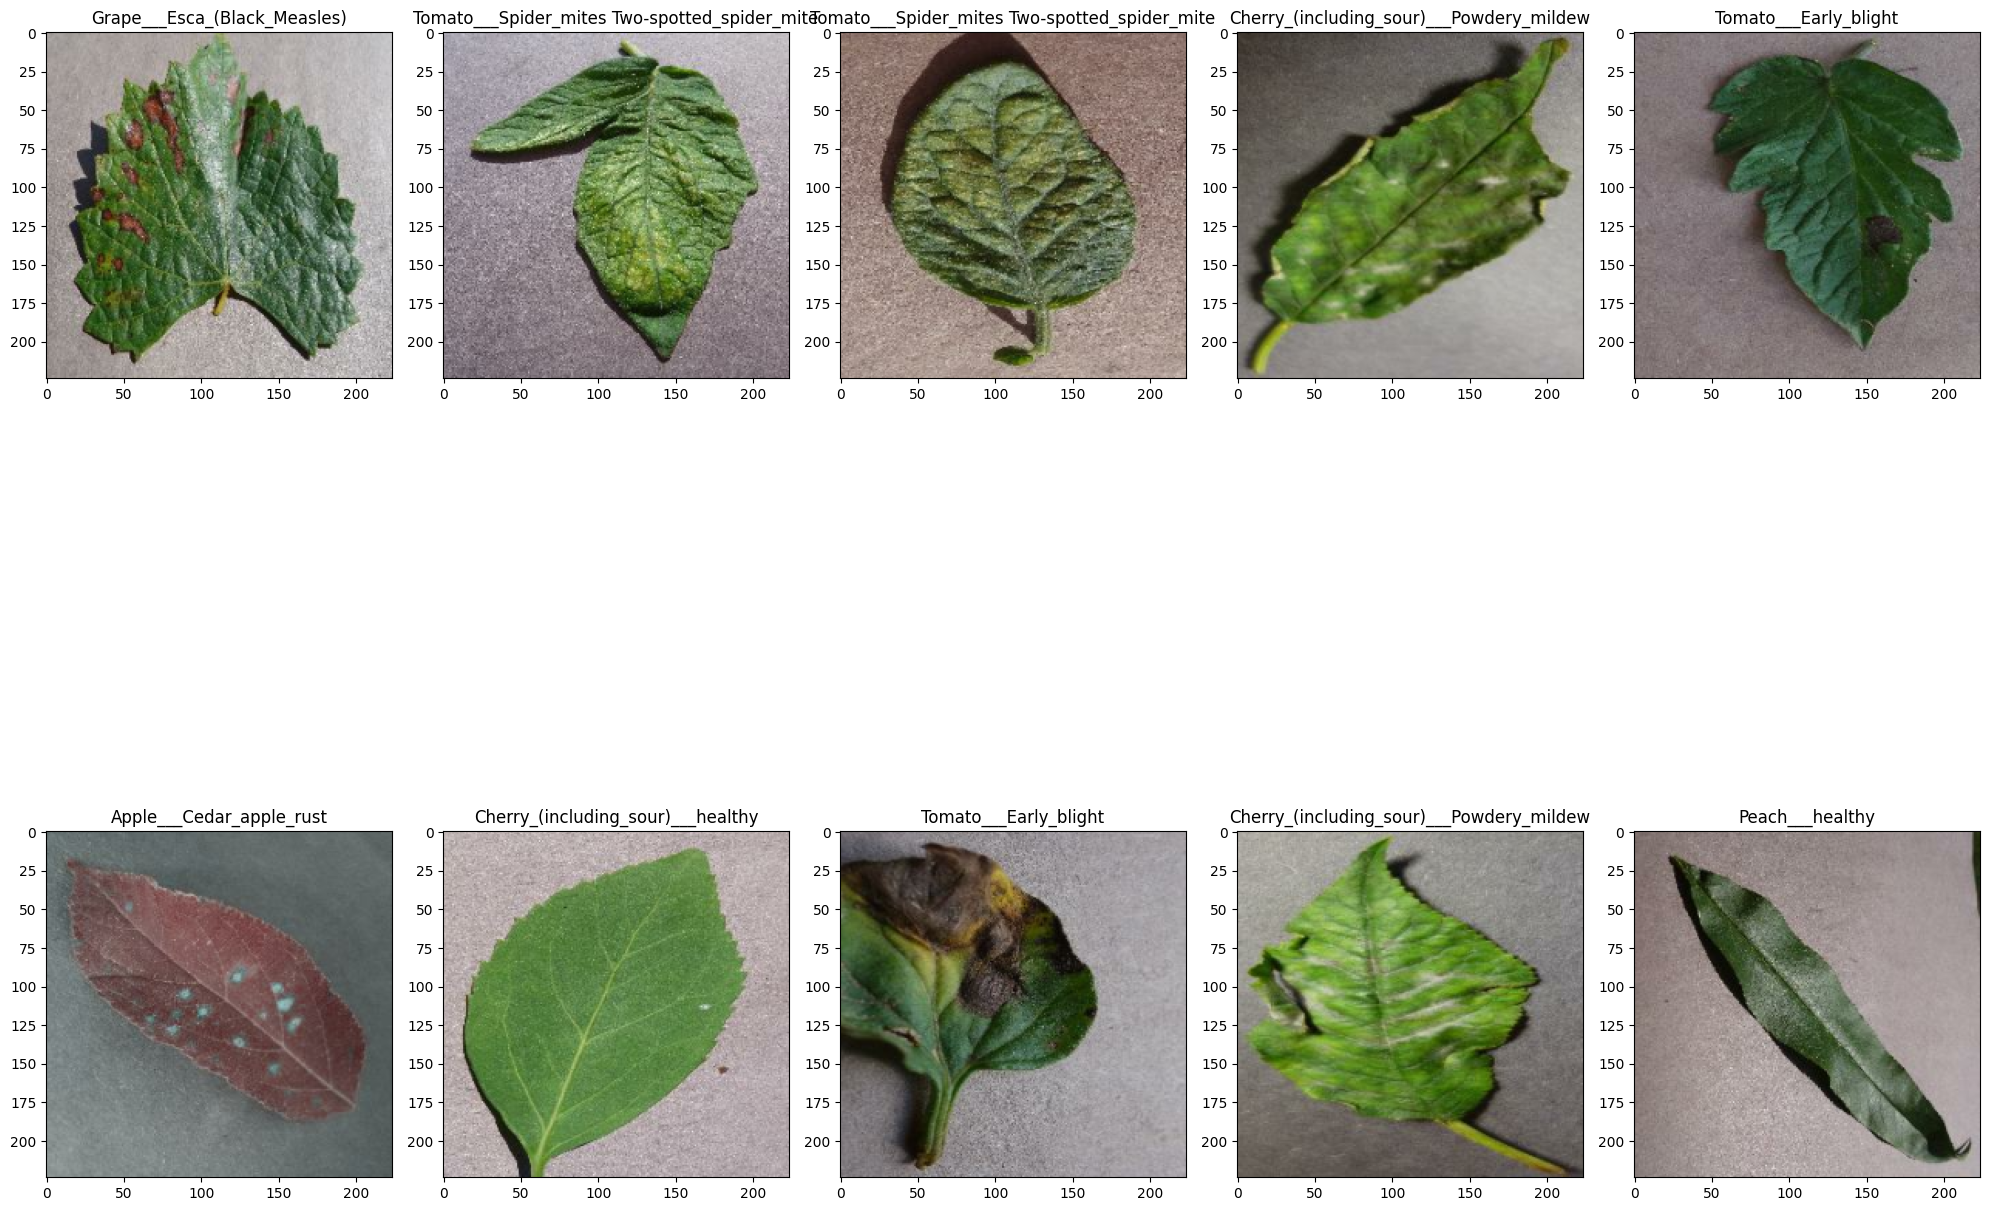

In [14]:
def plotImages(images,labels):
    
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
        
        axe.imshow(image/255)
        axe.set_title(list(train_batchs.class_names)[int(label)])

    plt.tight_layout()
    plt.show()
    
    
plotImages(imgs,labels)

In [15]:
resize_and_rescale = Sequential([

preprocessing.Resizing(224,224),
preprocessing.Rescaling(1.0/255)

])

data_augmention = Sequential([

preprocessing.RandomFlip("vertical"),
preprocessing.RandomRotation(0.2)

])

In [16]:

model = Sequential()

model.add(Input(shape=(224,224,3)))

model.add(resize_and_rescale)

model.add(data_augmention)

model.add(Conv2D(input_shape=(224,224,3),filters=32,kernel_size=(3,3),padding="same",activation="relu"))


model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation(relu))
model.add(BatchNormalization())


model.add(Dropout(0.2))

model.add(Dense(units=num_of_classes,activation="softmax"))



CREATE MODEL

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)       

In [18]:
model.compile(Adam(learning_rate=0.001),SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])

In [23]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)
filepath = "saved-model-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
model.fit(x=train_batchs,validation_data=(valid_batchs),workers=-1,epochs=100,verbose=1, callbacks=[es,checkpoint])

Epoch 1/100
2197/2197 [==============================] - 1332s 598ms/step - loss: 0.6082 - accuracy: 0.8203 - val_loss: 1.7943 - val_accuracy: 0.6283

Epoch 00001: val_accuracy improved from -inf to 0.62827, saving model to saved-model-01-0.63.hdf5
Epoch 2/100
2197/2197 [==============================] - 1153s 523ms/step - loss: 0.2364 - accuracy: 0.9253 - val_loss: 2.7124 - val_accuracy: 0.5763

Epoch 00002: val_accuracy did not improve from 0.62827
Epoch 3/100
2197/2197 [==============================] - 451s 203ms/step - loss: 0.1663 - accuracy: 0.9467 - val_loss: 0.5099 - val_accuracy: 0.8730

Epoch 00003: val_accuracy improved from 0.62827 to 0.87304, saving model to saved-model-03-0.87.hdf5
Epoch 4/100
2197/2197 [==============================] - 401s 182ms/step - loss: 0.1515 - accuracy: 0.9524 - val_loss: 0.3771 - val_accuracy: 0.8926

Epoch 00004: val_accuracy improved from 0.87304 to 0.89256, saving model to saved-model-04-0.89.hdf5
Epoch 5/100
2197/2197 [====================

In [24]:
if os.path.isdir("model/plant_diseases_model.h5") is False:
    model.save("model/plant_diseases_model.h5")


In [19]:
model.load_weights("saved-model-16-0.99.hdf5")

Prediction

In [20]:
results = model.evaluate(test_batchs,)
print("test loss, test acc:", results)


440/440 [==============================] - 231s 499ms/step - loss: 0.0242 - accuracy: 0.9916
test loss, test acc: [0.02418597973883152, 0.9916067719459534]


In [21]:
values = list(test_batchs.take(1))[0]
values

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
 array([[[[124.81633  , 113.81633  , 117.81633  ],
          [125.12755  , 114.12755  , 118.12755  ],
          [128.69897  , 117.69898  , 121.69898  ],
          ...,
          [170.48479  , 165.48479  , 169.48479  ],
          [178.67862  , 173.67862  , 177.67862  ],
          [179.80612  , 174.80612  , 178.80612  ]],
 
         [[132.82654  , 121.82653  , 125.82653  ],
          [126.37755  , 115.37755  , 119.37755  ],
          [119.47959  , 108.47959  , 112.47959  ],
          ...,
          [167.50514  , 162.50514  , 166.50514  ],
          [168.68878  , 163.68878  , 167.68878  ],
          [164.53053  , 159.53053  , 163.53053  ]],
 
         [[120.04591  , 109.04591  , 113.04591  ],
          [124.561226 , 113.561226 , 117.561226 ],
          [129.53061  , 118.53061  , 122.53061  ],
          ...,
          [171.1582   , 166.1582   , 170.1582   ],
          [171.85204  , 166.85204  , 170.85204  ],
          [166.4744   

In [22]:
imgs,labels = values[0],values[1]
imgs,labels

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
 array([[[[124.81633  , 113.81633  , 117.81633  ],
          [125.12755  , 114.12755  , 118.12755  ],
          [128.69897  , 117.69898  , 121.69898  ],
          ...,
          [170.48479  , 165.48479  , 169.48479  ],
          [178.67862  , 173.67862  , 177.67862  ],
          [179.80612  , 174.80612  , 178.80612  ]],
 
         [[132.82654  , 121.82653  , 125.82653  ],
          [126.37755  , 115.37755  , 119.37755  ],
          [119.47959  , 108.47959  , 112.47959  ],
          ...,
          [167.50514  , 162.50514  , 166.50514  ],
          [168.68878  , 163.68878  , 167.68878  ],
          [164.53053  , 159.53053  , 163.53053  ]],
 
         [[120.04591  , 109.04591  , 113.04591  ],
          [124.561226 , 113.561226 , 117.561226 ],
          [129.53061  , 118.53061  , 122.53061  ],
          ...,
          [171.1582   , 166.1582   , 170.1582   ],
          [171.85204  , 166.85204  , 170.85204  ],
          [166.4744   

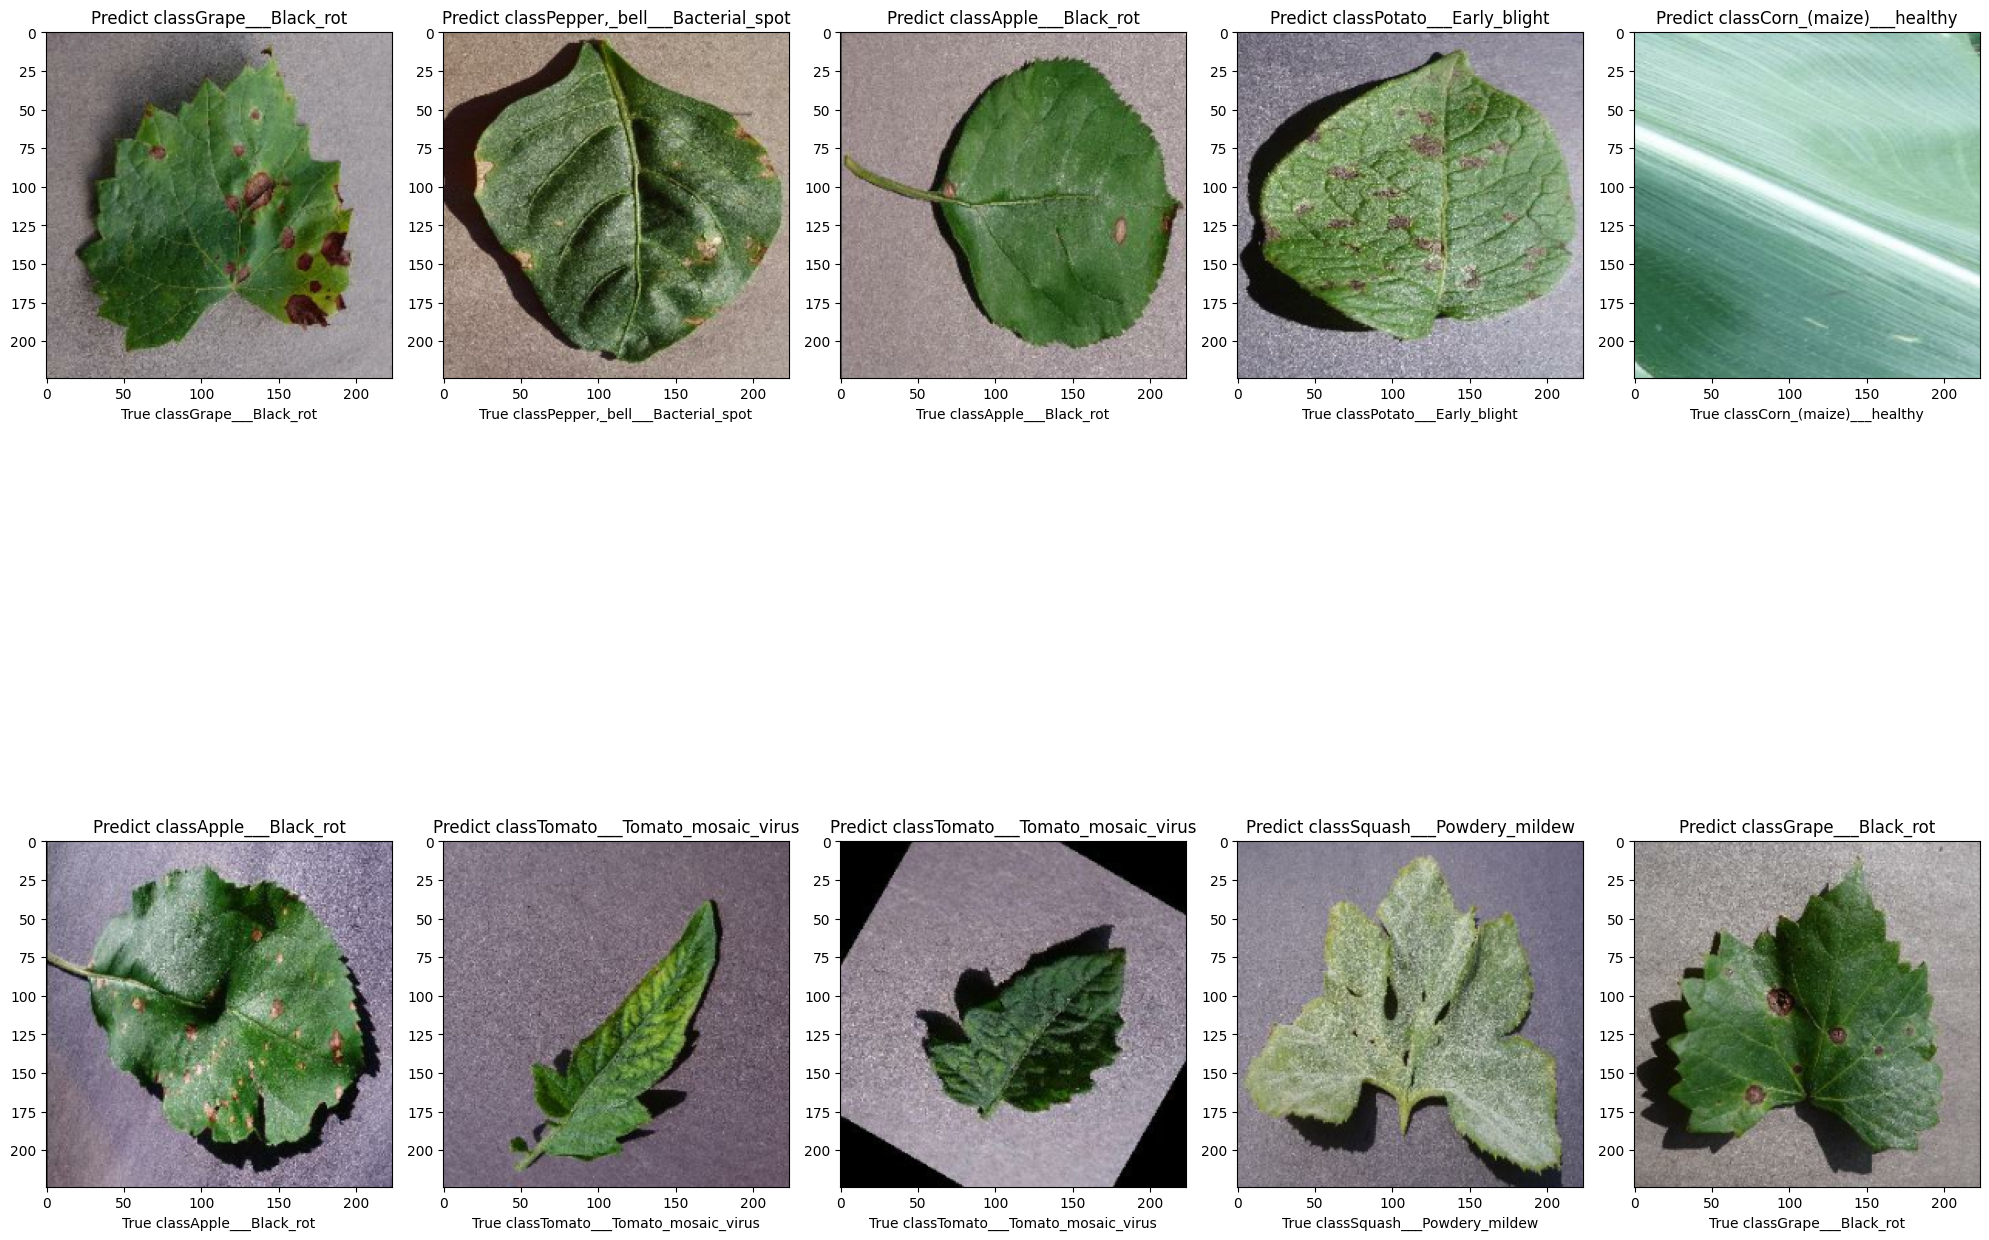

In [28]:
def plotImages(images,labels):
    
    fig,axes = plt.subplots(2,5,figsize=(20,20))
    
    axes = axes.flatten()
    
    for image,label,axe in zip(images,labels,axes):
        
        axe.imshow(image/255)
        image = np.expand_dims(image, axis=0)

        result = np.squeeze(model.predict(np.array(image)))

        index = np.argmax(result)
        axe.set_title("Predict class "+list(train_batchs.class_names)[index])
        axe.set_xlabel("True class "+list(train_batchs.class_names)[label])

    plt.tight_layout()
    plt.show()
    
    
plotImages(imgs,labels)

In [30]:
import tensorflow as tf

model = tf.keras.models.load_model('model/plant_diseases_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model/plant_diseases_model_lite.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\hosma\AppData\Local\Temp\tmpiz7m4jft\assets


105934680